In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib
from matplotlib.lines import Line2D
from scipy.stats import pearsonr
from collections import OrderedDict
from cuts import err_cuts

matplotlib.rcParams["mathtext.fontset"] = "stix"
matplotlib.rcParams["font.family"] = "STIXGeneral"
matplotlib.rcParams["lines.linewidth"] = 2
matplotlib.rcParams["axes.linewidth"] = 1.2
matplotlib.rcParams["xtick.major.size"] = 8.0
matplotlib.rcParams["ytick.major.size"] = 8.0
matplotlib.rcParams["xtick.minor.size"] = 3.0
matplotlib.rcParams["ytick.minor.size"] = 3.0
matplotlib.rcParams["xtick.minor.visible"] = True
matplotlib.rcParams["xtick.direction"] = "in"
matplotlib.rcParams["ytick.minor.visible"] = True
matplotlib.rcParams["ytick.direction"] = "in"
matplotlib.rcParams["xtick.top"] = True
matplotlib.rcParams["ytick.right"] = True
matplotlib.rcParams['hatch.linewidth'] = 1.5

In [2]:
import warnings
warnings.filterwarnings('ignore')

Reading in data

In [3]:
# master = pd.read_csv('data/master_v3.csv')
master = pd.read_csv('data/master_v3.1.csv')
master.dropna(subset=['c_snana'],inplace=True)

In [4]:
peak_t0 = pd.read_csv('data/colorData/peakmags_salt2t0.txt')
peak_t0.replace(to_replace='SN2', value='2', regex=True, inplace=True)
peak_t0.replace(to_replace='SN1', value='1', regex=True, inplace=True)
peak_t0.replace(to_replace='AT2', value='2', regex=True, inplace=True)
peak_t0.replace(to_replace='AT1', value='1', regex=True, inplace=True)

In [5]:
bv = pd.read_csv('data/colorData/salt2pars_BV_salt2-extended-h17.dat')
bv.replace(to_replace='SN2', value='2', regex=True, inplace=True)
bv.replace(to_replace='SN1', value='1', regex=True, inplace=True)
bv.replace(to_replace='AT2', value='2', regex=True, inplace=True)
bv.replace(to_replace='AT1', value='1', regex=True, inplace=True)
bv['Name'] = bv.Name.str.lower()
bv['Survey'] = bv['Survey'].astype('category')
bv['Survey'].cat.set_categories(['CSP','CfA4','CfA3','CfA2','CfA1','Hamuy96','Swift'],ordered=True)
bv.sort_values('Survey',inplace=True)
bv.drop_duplicates(subset='Name',keep='first',inplace=True)

bvri = pd.read_csv('data/colorData/salt2pars_BVRIri_salt2-extended-h17.dat')
bvri.replace(to_replace='SN2', value='2', regex=True, inplace=True)
bvri.replace(to_replace='SN1', value='1', regex=True, inplace=True)
bvri.replace(to_replace='AT2', value='2', regex=True, inplace=True)
bvri.replace(to_replace='AT1', value='1', regex=True, inplace=True)
bvri['Name'] = bvri.Name.str.lower()
bvri['Survey'] = bvri['Survey'].astype('category')
bvri['Survey'].cat.set_categories(['CSP','CfA4','CfA3','CfA2','CfA1','Hamuy96','Swift'],ordered=True)
for i in bvri.index:
    if len(bvri.loc[i,'bands'].strip()) < 4:
        bvri.drop(index=i,inplace=True)
bvri.sort_values('Survey',inplace=True)
bvri.drop_duplicates(subset='Name',keep='first',inplace=True)

ri = pd.read_csv('data/colorData/salt2pars_riRI_salt2-extended-h17.dat')
ri.replace(to_replace='SN2', value='2', regex=True, inplace=True)
ri.replace(to_replace='SN1', value='1', regex=True, inplace=True)
ri.replace(to_replace='AT2', value='2', regex=True, inplace=True)
ri.replace(to_replace='AT1', value='1', regex=True, inplace=True)
ri['Name'] = ri.Name.str.lower()
ri['Survey'] = ri['Survey'].astype('category')
ri['Survey'].cat.set_categories(['CSP','CfA4','CfA3','CfA2','CfA1','Hamuy96','Swift'],ordered=True)
ri.sort_values('Survey',inplace=True)
ri.drop_duplicates(subset='Name',keep='first',inplace=True)

gri = pd.read_csv('data/colorData/salt2pars_griRI_salt2-extended-h17.dat')
gri.replace(to_replace='SN2', value='2', regex=True, inplace=True)
gri.replace(to_replace='SN1', value='1', regex=True, inplace=True)
gri.replace(to_replace='AT2', value='2', regex=True, inplace=True)
gri.replace(to_replace='AT1', value='1', regex=True, inplace=True)
gri['Name'] = gri.Name.str.lower()
gri['Survey'] = gri['Survey'].astype('category')
gri['Survey'].cat.set_categories(['CSP','CfA4','CfA3','CfA2','CfA1','Hamuy96','Swift'],ordered=True)
for i in gri.index:
    if len(gri.loc[i,'bands'].strip()) < 3:
        gri.drop(index=i,inplace=True)
gri.sort_values('Survey',inplace=True)
gri.drop_duplicates(subset='Name',keep='first',inplace=True)

In [6]:
print(len(bv))
print(len(bvri))
print(len(ri))
print(len(gri))

581
469
728
372


In [7]:
master_vels = master[['Name','vel','vel_err']].copy(deep=True)
master_vels.rename(columns={'vel':'vel_master','vel_err':'velerr'},inplace=True)

bv_vel = pd.merge(bv, master_vels, on='Name', how='inner')
bv_vel = err_cuts(bv_vel, c_err_cut=0.2, shp_cor_cut=None, x1_err_cut=None)

bvri_vel = pd.merge(bvri, master_vels, on='Name', how='inner')
bvri_vel = err_cuts(bvri_vel, c_err_cut=0.3, shp_cor_cut=None, x1_err_cut=None)

ri_vel = pd.merge(ri, master_vels, on='Name', how='inner')
ri_vel = err_cuts(ri_vel, c_err_cut=0.2, shp_cor_cut=None, x1_err_cut=None)

gri_vel = pd.merge(gri, master_vels, on='Name', how='inner')
gri_vel = err_cuts(gri_vel, c_err_cut=0.3, shp_cor_cut=None, x1_err_cut=None)

In [8]:
print(len(bv_vel))
print(len(bvri_vel))
print(len(ri_vel))
print(len(gri_vel))

164
162
235
147


The function "perfStats" does all of the statistics for the $c_{ri}$ vs $c_{BV}$ plots below

In [9]:
def perfStats(data1, data2, key='c', sig_thresh=3.0):
    key_tmp1 = []
    key_tmp2 = []
    keyerr_tmp1 = []
    keyerr_tmp2 = []
    velocity = []
    keyerr = key + '_err'
    for row_i in data1.itertuples():
    # itertuples is a pandas generator method that creates "named tuples" which can be 
    # accessed via the bult-in "getattr" which takes the named tuple object and key string
    # this must be done because there is no guarantee that the two dataframes are in the
    # same order or contain the same objects
        name_i = getattr(row_i, 'Name')
        key_i = getattr(row_i, key)
        for row_j in data2.itertuples():
            name_j = getattr(row_j, 'Name')
            key_j = getattr(row_j, key)
            if (name_i == name_j and abs(key_i) < 0.6 and abs(key_j) < 0.6):
                key_tmp1.append(key_i)
                key_tmp2.append(key_j)
                keyerr_tmp1.append(getattr(row_i,keyerr))
                keyerr_tmp2.append(getattr(row_j,keyerr))
                velocity.append(getattr(row_i,'vel_master'))
                
    # calculate RMS, mean, and standard deviation
    perp_dist = []
    perp_dist_sq = []
    for i in range(len(key_tmp1)):
        perp_dist.append(key_tmp1[i] - key_tmp2[i])
        perp_dist_sq.append((key_tmp1[i] - key_tmp2[i])**2.0)
    perp_dist = np.asarray(perp_dist)
    perp_dist_sq = np.asarray(perp_dist_sq)
    weights = 1.0/(np.asarray(keyerr_tmp1)**2.0 + np.asarray(keyerr_tmp2)**2.0)

    data_mean = np.average(perp_dist, weights=weights)
    data_rms = np.sqrt(np.average(perp_dist_sq, weights=weights))
    data_sdv = np.sqrt(np.average((perp_dist-data_mean)**2.0, weights=weights))
    data_err = data_sdv/len(key_tmp1)
    
    # creating a mask to censor outlier data    
    mask = [np.abs(np.asarray(perp_dist)) < sig_thresh*data_sdv]
    mask_inv = [np.abs(np.asarray(perp_dist)) > sig_thresh*data_sdv]
    perp_dist_n = np.asarray(perp_dist)[mask]
    perp_dist_sq_n = np.asarray(perp_dist_sq)[mask]
    weights_n = 1.0/(np.asarray(keyerr_tmp1)[mask]**2.0 + np.asarray(keyerr_tmp2)[mask]**2.0)
    velocity_n = np.asarray(velocity)[mask]
    
    key_tmp1_n = np.asarray(key_tmp1)[mask].astype('float')
    key_tmp2_n = np.asarray(key_tmp2)[mask].astype('float')
    keyerr_tmp1_n = np.asarray(keyerr_tmp1)[mask].astype('float')
    keyerr_tmp2_n = np.asarray(keyerr_tmp2)[mask].astype('float')
    key_tmp1_cens = np.asarray(key_tmp1)[mask_inv].astype('float')
    key_tmp2_cens = np.asarray(key_tmp2)[mask_inv].astype('float')
    
    # calculating perp dist average for high vs low velocity
    pd_hv = np.asarray(perp_dist_n)[np.asarray(velocity_n) < -11.8]
    pd_lv = np.asarray(perp_dist_n)[np.asarray(velocity_n) >= -11.8]
    weights_hv = 1.0/(np.asarray(keyerr_tmp1_n)[np.asarray(velocity_n) < -11.8]**2.0 + 
                      np.asarray(keyerr_tmp2_n)[np.asarray(velocity_n) < -11.8]**2.0)
    weights_lv = 1.0/(np.asarray(keyerr_tmp1_n)[np.asarray(velocity_n) >= -11.8]**2.0 + 
                      np.asarray(keyerr_tmp2_n)[np.asarray(velocity_n) >= -11.8]**2.0)
    
    data_mean_n = np.average(perp_dist_n, weights=weights_n)
    data_rms_n = np.sqrt(np.average(perp_dist_sq_n, weights=weights_n))
    data_sdv_n = np.sqrt(np.average((perp_dist_n-data_mean_n)**2.0, weights=weights_n)/len(perp_dist_n))
    chisq = np.sum((perp_dist_n - data_mean_n)**2.0*weights_n)
    print('chisq = {}'.format(chisq))
    
    data_mean_unweighted = np.mean(perp_dist_n)
    data_rms_unweighted = np.sqrt(np.mean(perp_dist_sq_n))
    data_sdv_unweighted = np.sqrt(np.mean((perp_dist_n-data_mean_n)**2.0)/len(perp_dist_n))
    
    pdavg_hv = np.average(pd_hv, weights=weights_hv)
    pdrms_hv = np.sqrt(np.average((pd_hv-pdavg_hv)**2.0, weights=weights_hv))
    pderr_hv = np.sqrt(np.average((pd_hv-pdavg_hv)**2.0, weights=weights_hv))/np.sqrt(len(pd_hv))
    print('N_HV = {}'.format(len(pd_hv)))
    pdavg_lv = np.average(pd_lv, weights=weights_lv)
    pdrms_lv = np.sqrt(np.average((pd_lv-pdavg_lv)**2.0, weights=weights_lv))
    pderr_lv = np.sqrt(np.average((pd_lv-pdavg_lv)**2.0, weights=weights_lv))/np.sqrt(len(pd_lv))
    print('N_LV = {}'.format(len(pd_lv)))
    
    data_err_n = data_sdv_n/len(key_tmp1_n)
    
    data_r, data_r_p2 = pearsonr(key_tmp1_n, key_tmp2_n)
    
    return (data_mean_n, data_rms_n, data_sdv_n, data_r, len(key_tmp1_n), key_tmp1_cens, key_tmp2_cens, pdavg_hv, 
            pderr_hv, pdavg_lv, pderr_lv, data_mean_unweighted, data_rms_unweighted, data_sdv_unweighted, 
            pdrms_hv, pdrms_lv)

The function "singlePlotHelp" does the plotting of the $c_{ri}$ vs $c_{BV}$ plots below. It also calls the function "perfStats" above to calculate its statistics

In [10]:
def singlePlotHelp(data1, data2, title1, title2, key='c', rel_norm=False, custom_text_loc=None, verbose=False, draw_cbar=True, text_justify='left', text_space=0.1, text_split=False, survey_markers=None,sig_thresh=3.0):
    if draw_cbar:
        plt.figure(figsize=(9,5))
    else:
        plt.figure(figsize=(8,5))
    key_tmp1 = []
    key_tmp2 = []
    keyerr_tmp1 = []
    keyerr_tmp2 = []
    colorbar_tmp = []
    survey_tmp = []
    keyerr = key + '_err'

    for row_i in data1.itertuples():
        name_i = getattr(row_i, 'Name')
        for row_j in data2.itertuples():
            name_j = getattr(row_j, 'Name')
            if name_i == name_j:
                key_tmp1.append(getattr(row_i, key))
                key_tmp2.append(getattr(row_j, key))
                keyerr_tmp1.append(getattr(row_i,keyerr))
                keyerr_tmp2.append(getattr(row_j,keyerr))
                colorbar_tmp.append(getattr(row_i,'vel_master'))
                survey_tmp.append(getattr(row_i,'Survey'))

    stats = perfStats(data1, data2, key=key, sig_thresh=sig_thresh)
    if verbose:
        print('<x-y> = {:.5f}'.format(stats[0]))
        print('x-y_rms = {:08.5f}'.format(stats[1]))
        print('x-y_std = {:08.5f}'.format(stats[2]))
        print('pearson-r = {:08.5f}'.format(stats[3]))
        print('<x-y> unweighted = {:08.5f}'.format(stats[11]))
        print('x-y_rms unweighted = {:08.5f}'.format(stats[12]))
        print('x-y_std unweighted = {:08.5f}'.format(stats[13]))
        print('N = {}'.format(stats[4]))
        print('<x-y>_HV = {:08.5f}'.format(stats[7]))
        print('se_mean_HV = {:08.5f}'.format(stats[8]))
        print('rms_HV = {:08.5f}'.format(stats[14]))
        print('<x-y>_LV = {:08.5f}'.format(stats[9]))
        print('se_mean_LV = {:08.5f}'.format(stats[10]))
        print('rms_LV = {:08.5f}'.format(stats[15]))
        
    
    # Plotting high/low bars
    plt.fill_between(np.linspace(-1,2), np.linspace(-1,2)-stats[7]+stats[8], 
                     np.linspace(-1,2)-stats[7]-stats[8], alpha=0.25, color='red')
    plt.fill_between(np.linspace(-1,2), np.linspace(-1,2)-stats[9]+stats[10], 
                     np.linspace(-1,2)-stats[9]-stats[10], alpha=0.25, color='blue')
    
    if (not rel_norm):
        if (key == 'c'):
            plt.plot(np.linspace(-1,2), np.linspace(-1,2), 'k')
        else:
            upper = max(np.concatenate((key_tmp1,key_tmp2)))
            lower = min(np.concatenate((key_tmp1,key_tmp2)))
            plt.plot(np.linspace(lower,upper), np.linspace(lower,upper))
    else:
        plt.plot([min(key_tmp1),max(key_tmp1)],[0,0])
    
    if (rel_norm):
        for i in range(len(key_tmp1)):
            x = key_tmp1[i]
            y = key_tmp2[i]
            
            key_tmp2[i] = y - x
    plt.errorbar(key_tmp1, key_tmp2, xerr=keyerr_tmp1, yerr=keyerr_tmp2, 
                 fmt='none', ecolor='k', alpha=0.1)
    plt.plot(stats[5], stats[6], 'gx')
    if custom_text_loc is not None:
        text_loc=custom_text_loc
    else:
        if (key == 'c'):
            text_loc = (-0.28,0.6)
        elif (key == 'x0'):
            text_loc = (0.005,0.12)
        elif (key == 'x1'):
            text_loc = (-2,1)
        else:
            text_loc = (0,0)
    if text_split:
        plt.text(text_loc[0], text_loc[1], ' <x-y>$_{{HV}}$ = {:05.3f} $\pm$ {:05.3f}'.format(stats[7],stats[8]),
                 fontsize=18, color='red', ha=text_justify)
        plt.text(text_loc[0], text_loc[1]-text_space, ' <x-y>$_{{NV}}$ = {:05.3f} $\pm$ {:05.3f}'.format(stats[9],stats[10]),
                 fontsize=18, color='blue', ha=text_justify)
        plt.text(text_loc[2], text_loc[3], ' N = {}'.format(stats[4]), fontsize=18, ha=text_justify)
    else:
        plt.text(text_loc[0], text_loc[1], ' <x-y>$_{{HV}}$ = {:05.3f} $\pm$ {:05.3f}'.format(stats[7],stats[8]),
                 fontsize=18, color='red', ha=text_justify)
        plt.text(text_loc[0], text_loc[1]-text_space, ' <x-y>$_{{NV}}$ = {:05.3f} $\pm$ {:05.3f}'.format(stats[9],stats[10]),
                 fontsize=18, color='blue', ha=text_justify)
        plt.text(text_loc[0], text_loc[1]-text_space*2, ' N = {}'.format(stats[4]), fontsize=18, ha=text_justify)
    
    if survey_markers is not None:
        for surv in survey_markers.keys():
            mask = np.array(survey_tmp) == surv
            plt.scatter(np.array(key_tmp1)[mask], np.array(key_tmp2)[mask], 
                        marker=survey_markers[surv], 
                        c=np.array(colorbar_tmp)[mask], cmap='RdBu', vmin=-14.6, vmax=-9.0)
    else:
        plt.scatter(key_tmp1, key_tmp2, c=colorbar_tmp, cmap='RdBu', vmin=-14.6, vmax=-9.0)
    if draw_cbar:
        cbar = plt.colorbar()
        cbar.set_label('Si II Velocity [1000 km/s]',fontsize=20)
        cbar.ax.tick_params(labelsize=20)
        
    if survey_markers is not None:
        legend_elements = []
        for surv in survey_markers.keys():
            mask = np.array(survey_tmp) == surv
            plt.plot(np.array(key_tmp1)[mask], np.array(key_tmp2)[mask], 
                     marker=survey_markers[surv], color='k', mfc='none', alpha=0.5, linestyle='')
            print('{} N = {}'.format(surv,len(np.array(key_tmp1)[mask])))
        plt.legend(handles=legend_elements,loc=(text_loc[2]+0.4,text_loc[3]-0.05))
            
    else:
        plt.plot(key_tmp1, key_tmp2, 'ko', mfc='none', alpha=0.5)
    if (key == 'c'):
        plt.ylim([-0.4, 0.7])
        plt.xlim([-0.3, 0.5])
    
    xlabel = key + ' [' + title1 + ']'
    ylabel = key + ' [' + title2 + ']'
    plt.gca().tick_params(labelsize=20)
    plt.xlabel(xlabel,fontsize=32)
    plt.ylabel(ylabel,fontsize=32)

chisq = 33.8083489889
N_HV = 14
N_LV = 55
<x-y> = -0.00512
x-y_rms = 00.02621
x-y_std = 00.00309
pearson-r = 00.97982
<x-y> unweighted = -0.00476
x-y_rms unweighted = 00.02625
x-y_std unweighted = 00.00311
N = 69
<x-y>_HV = -0.00814
se_mean_HV = 00.00511
rms_HV = 00.01911
<x-y>_LV = -0.00434
se_mean_LV = 00.00365
rms_LV = 00.02708


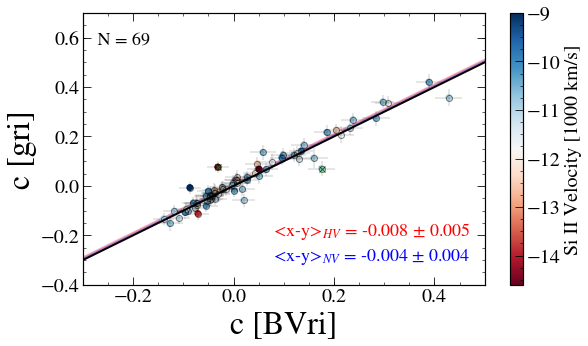

In [11]:
# Need to ensure that the same objects are in each and that they are sorted properly
gri_vel = gri_vel[np.isin(gri_vel.Name, bvri_vel.Name)]
bvri_vel = bvri_vel[np.isin(bvri_vel.Name, gri_vel.Name)]
gri_vel.sort_values(by='Name',inplace=True)
bvri_vel.sort_values(by='Name',inplace=True)

singlePlotHelp(bvri_vel, gri_vel, 'BVri','gri',
               custom_text_loc=(0.07,-0.2,-0.28,0.575),text_split=True,verbose=True)
plt.savefig('colorColor_figures/bvri_gri_comp.pdf',bbox_inches='tight')
plt.savefig('colorColor_figures/bvri_gri_comp.png',bbox_inches='tight')

chisq = 212.337345191
N_HV = 36
N_LV = 108
<x-y> = 0.01495
x-y_rms = 00.10863
x-y_std = 00.00897
pearson-r = 00.60743
<x-y> unweighted = 00.01717
x-y_rms unweighted = 00.11100
x-y_std unweighted = 00.00914
N = 144
<x-y>_HV = 00.07800
se_mean_HV = 00.02052
rms_HV = 00.12312
<x-y>_LV = -0.00494
se_mean_LV = 00.00902
rms_LV = 00.09379


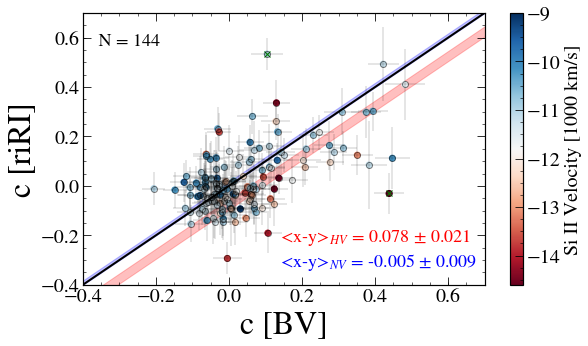

In [12]:
# Need to insure that the same objects are in each and that they are sorted properly
ri_vel = ri_vel[np.isin(ri_vel.Name, bv_vel.Name)]
bv_vel = bv_vel[np.isin(bv_vel.Name, ri_vel.Name)]
ri_vel.sort_values(by='Name',inplace=True)
ri_vel.sort_values(by='Name',inplace=True)

mask = bv_vel.c < 0.5
singlePlotHelp(bv_vel[mask.to_numpy(dtype='bool')], ri_vel[mask.to_numpy(dtype='bool')], 'BV', 'riRI', 
               custom_text_loc=(0.13,-0.225,-0.37,0.57),text_split=True,verbose=True)
plt.xlim([-0.4,0.7])
plt.ylim([-0.4,0.7])
plt.savefig('colorColor_figures/bv_ri_comp_v2.pdf',bbox_inches='tight')
plt.savefig('colorColor_figures/bv_ri_comp_v2.png',bbox_inches='tight')

['CSP' 'CfA1' 'CfA2' 'CfA3' 'LOSS' 'Swift']
['CSP' 'CfA1' 'CfA2' 'CfA3' 'Foundation' 'LOSS']
chisq = 212.337345191
N_HV = 36
N_LV = 108
LOSS N = 22
CfA1 N = 3
CfA2 N = 15
CfA3 N = 36
CfA4 N = 0
CSP N = 69


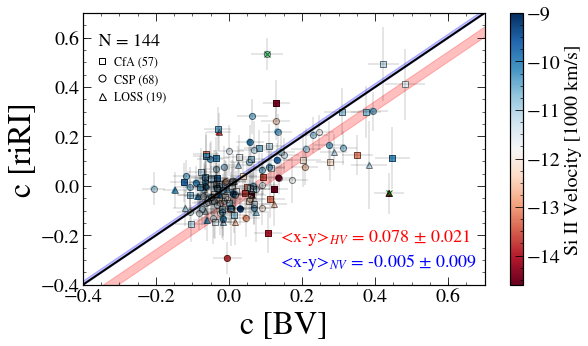

In [13]:
print(np.unique(bv_vel.Survey))
print(np.unique(ri_vel.Survey))
survey_markers = {'CSP':'o','CfA1':'s','CfA2':'s','CfA3':'s','CfA4':'s','LOSS':'^'}

mask = bv_vel.c < 0.5
singlePlotHelp(bv_vel[mask.to_numpy(dtype='bool')], ri_vel[mask.to_numpy(dtype='bool')], 'BV', 'riRI', 
               custom_text_loc=(0.13,-0.225,-0.37,0.57),text_split=True,
               survey_markers=survey_markers)
plt.xlim([-0.4,0.7])
plt.ylim([-0.4,0.7])

legend_elements = [Line2D([0],[0], marker='s',color='k',fillstyle='none',linestyle='',label='CfA (57)',markersize=6),
                   Line2D([0],[0], marker='o',color='k',fillstyle='none',linestyle='',label='CSP (68)',markersize=7),
                   Line2D([0],[0], marker='^',color='k',fillstyle='none',linestyle='',label='LOSS (19)',markersize=7)]
plt.legend(handles=legend_elements,loc=(0.007,0.65),frameon=False,prop={'size':12},handletextpad=0.0)
plt.savefig('colorColor_figures/bv_ri_comp_survey_mark.pdf',bbox_inches='tight')
plt.savefig('colorColor_figures/bv_ri_comp_survey_mark.png',bbox_inches='tight')

chisq = 162.488084811
N_HV = 33
N_LV = 105
LOSS N = 22
CfA1 N = 3
CfA2 N = 15
CfA3 N = 36
CfA4 N = 0
CSP N = 69


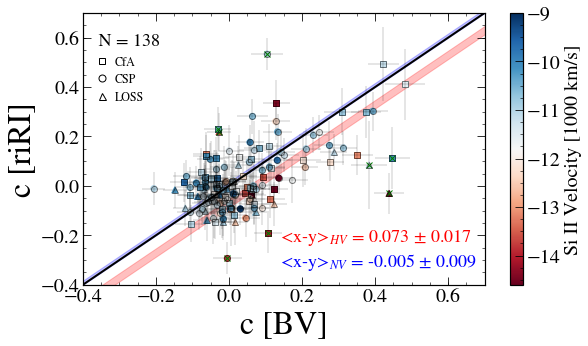

In [14]:
mask = bv_vel.c < 0.5
singlePlotHelp(bv_vel[mask.to_numpy(dtype='bool')], ri_vel[mask.to_numpy(dtype='bool')], 'BV', 'riRI', 
               custom_text_loc=(0.13,-0.225,-0.37,0.57),text_split=True,
               survey_markers=survey_markers,sig_thresh=2.0)
plt.xlim([-0.4,0.7])
plt.ylim([-0.4,0.7])

legend_elements = [Line2D([0],[0], marker='s',color='k',fillstyle='none',linestyle='',label='CfA',markersize=6),
                   Line2D([0],[0], marker='o',color='k',fillstyle='none',linestyle='',label='CSP',markersize=7),
                   Line2D([0],[0], marker='^',color='k',fillstyle='none',linestyle='',label='LOSS',markersize=7)]
plt.legend(handles=legend_elements,loc=(0.007,0.65),frameon=False,prop={'size':12},handletextpad=0.0)

chisq = 81.1614321471
N_HV = 13
N_LV = 52
<x-y> = 0.00725
x-y_rms = 00.09386
x-y_std = 00.01161
pearson-r = 00.65724
<x-y> unweighted = 00.00830
x-y_rms unweighted = 00.09201
x-y_std unweighted = 00.01137
N = 65
<x-y>_HV = 00.06811
se_mean_HV = 00.02245
rms_HV = 00.08095
<x-y>_LV = -0.00782
se_mean_LV = 00.01253
rms_LV = 00.09032


(-0.4, 0.7)

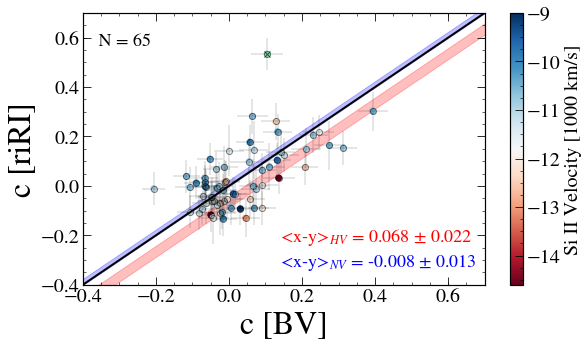

In [15]:
# Need to insure that the same objects are in each and that they are sorted properly
ri_vel_red = ri_vel[np.isin(ri_vel.Name, gri_vel.Name)]
bv_vel_red = bv_vel[np.isin(bv_vel.Name, gri_vel.Name)]
ri_vel_red.sort_values(by='Name',inplace=True)
ri_vel_red.sort_values(by='Name',inplace=True)

mask = bv_vel_red.c < 0.5
singlePlotHelp(bv_vel_red[mask.to_numpy(dtype='bool')], ri_vel_red[mask.to_numpy(dtype='bool')], 'BV', 'riRI', 
               custom_text_loc=(0.13,-0.225,-0.37,0.57),text_split=True,verbose=True)
plt.xlim([-0.4,0.7])
plt.ylim([-0.4,0.7])

In [16]:
mwcor = pd.read_csv('data/colorData/mwebv_corrections.csv')

Separating the values from "peakmags_salt2t0.txt" into their individual filters and adding MW corrections to create the plot below.

In [17]:
g_mag = []
r_mag = []
i_mag = []
z_mag = []
B_mag = []
V_mag = []
name = []
surv = []
vel = []
z = []

for n in np.unique(peak_t0.Name_upper):
    name_o = n.lower()
    df_tmp = peak_t0[peak_t0.Name_upper == n]
    
    if len(master[master.Name == name_o]) > 0:
        mwcor_tmp = mwcor[mwcor.Name == name_o]
        if len(mwcor_tmp) <= 0:
            # These objects don't have MW extinction corrections becuase they don't make it into our final sample
            if 'Foundation-g' in np.unique(df_tmp.Filter):

                name.append(n)
                g_mag.append(df_tmp[df_tmp.Filter == 'Foundation-g'].peakmag.values[0])
                r_mag.append(df_tmp[df_tmp.Filter == 'Foundation-r'].peakmag.values[0])
                i_mag.append(df_tmp[df_tmp.Filter == 'Foundation-i'].peakmag.values[0])
                z_mag.append(df_tmp[df_tmp.Filter == 'Foundation-z'].peakmag.values[0])
                B_mag.append(np.nan)
                V_mag.append(np.nan)
                vel.append(master[master.Name == name_o].vel.values[0])
                surv.append('Foundation')

            elif 'CSP-B' in np.unique(df_tmp.Filter):

                name.append(n)
                g_mag.append(df_tmp[df_tmp.Filter == 'CSP-g'].peakmag.values[0])
                r_mag.append(df_tmp[df_tmp.Filter == 'CSP-r'].peakmag.values[0])
                i_mag.append(df_tmp[df_tmp.Filter == 'CSP-i'].peakmag.values[0])
                z_mag.append(np.nan)
                B_mag.append(df_tmp[df_tmp.Filter == 'CSP-B'].peakmag.values[0])
                V_mag.append(df_tmp[df_tmp.Filter == 'CSP-V0'].peakmag.values[0])
                vel.append(master[master.Name == name_o].vel.values[0])
                surv.append('CSP')
            
        else:
            if 'Foundation-g' in np.unique(df_tmp.Filter):

                name.append(n)
                g_mag.append(df_tmp[df_tmp.Filter == 'Foundation-g'].peakmag.values[0] + 
                             mwcor_tmp[mwcor_tmp.Filter == 'Foundation-g'].mwebv_corr.values[0])
                r_mag.append(df_tmp[df_tmp.Filter == 'Foundation-r'].peakmag.values[0] + 
                             mwcor_tmp[mwcor_tmp.Filter == 'Foundation-r'].mwebv_corr.values[0])
                i_mag.append(df_tmp[df_tmp.Filter == 'Foundation-i'].peakmag.values[0] + 
                             mwcor_tmp[mwcor_tmp.Filter == 'Foundation-i'].mwebv_corr.values[0])
                z_mag.append(df_tmp[df_tmp.Filter == 'Foundation-z'].peakmag.values[0] + 
                             mwcor_tmp[mwcor_tmp.Filter == 'Foundation-z'].mwebv_corr.values[0])
                B_mag.append(np.nan)
                V_mag.append(np.nan)
                vel.append(master[master.Name == name_o].vel.values[0])
                surv.append('Foundation')

            elif 'CSP-B' in np.unique(df_tmp.Filter):

                name.append(n)
                g_mag.append(df_tmp[df_tmp.Filter == 'CSP-g'].peakmag.values[0] + 
                             mwcor_tmp[mwcor_tmp.Filter == 'CSP-g'].mwebv_corr.values[0])
                r_mag.append(df_tmp[df_tmp.Filter == 'CSP-r'].peakmag.values[0] + 
                             mwcor_tmp[mwcor_tmp.Filter == 'CSP-r'].mwebv_corr.values[0])
                i_mag.append(df_tmp[df_tmp.Filter == 'CSP-i'].peakmag.values[0] + 
                             mwcor_tmp[mwcor_tmp.Filter == 'CSP-i'].mwebv_corr.values[0])
                z_mag.append(np.nan)
                B_mag.append(df_tmp[df_tmp.Filter == 'CSP-B'].peakmag.values[0] + 
                             mwcor_tmp[mwcor_tmp.Filter == 'CSP-B'].mwebv_corr.values[0])
                V_mag.append(df_tmp[df_tmp.Filter == 'CSP-V0'].peakmag.values[0] + 
                             mwcor_tmp[mwcor_tmp.Filter == 'CSP-V0'].mwebv_corr.values[0])
                vel.append(master[master.Name == name_o].vel.values[0])
                surv.append('CSP')
            
        z.append(master[master.Name == name_o].z.values[0])

In [18]:
mag_dict = {'Name':name, 'g':g_mag, 'r':r_mag, 'i':i_mag, 'z':z_mag,
            'B':B_mag, 'V':V_mag, 'vel':vel, 'z':z, 'Survey':surv}
df_peak = pd.DataFrame(mag_dict)

In [19]:
df_peak = df_peak[df_peak.vel < -6]
df_peak = df_peak[df_peak.Name != '2006EJ']
df_peak = df_peak[df_peak.Name != '2006EF']

Applying simple K-corrections for each point based on redshift. These corrections get **subtracted** from the color values

In [20]:
from scipy.interpolate import interp1d
kcorr = pd.read_csv('data/colorData/hsiao-kcorr-at-max-colors.txt',delim_whitespace=True,comment='#',
                    names=['z','kbv','kgr','kri'])

kbv_interp = interp1d(kcorr['z'].to_numpy(), kcorr['kbv'].to_numpy(), kind='cubic')
kgr_interp = interp1d(kcorr['z'].to_numpy(), kcorr['kgr'].to_numpy(), kind='cubic')
kri_interp = interp1d(kcorr['z'].to_numpy(), kcorr['kri'].to_numpy(), kind='cubic')

A function to help plot the color-color plot below.

In [21]:
def plotPeakCol(df, keys1, keys2, ax, xlabel, ylabel, cbar_key='vel', draw_cbar=True, kcorr1=None, kcorr2=None, surveys=False):
    '''Plots the difference between the labels in the tuple keys1 vs the difference
       between the data in the tuple keys2. If kcorr(1 or 2) is not None then it can be a 
       callable function that takes a redshift and return a k-correction to be subtracted 
       from either keys1 or keys 2.
    '''

    diff1 = df[keys1[0]] - df[keys1[1]]
    diff2 = df[keys2[0]] - df[keys2[1]]
    
    if kcorr1 is not None:
        diff1 = diff1 - kcorr1(df['z'])
    if kcorr2 is not None:
        diff2 = diff2 - kcorr2(df['z'])
    
    diff1_n = diff1[~np.isnan(diff1)]
    diff2_n = diff2[~np.isnan(diff1)]
    diff1_n = diff1_n[~np.isnan(diff2_n)]
    diff2_n = diff2_n[~np.isnan(diff2_n)]
    print pearsonr(diff1_n, diff2_n)
    
    if surveys:
        cbar = ax.scatter(diff1[df.Survey=='Foundation'],diff2[df.Survey=='Foundation'], marker='D',
                          c=df[cbar_key][df.Survey=='Foundation'],cmap='RdBu',vmin=-14.6,vmax=-9.0)
        ax.scatter(diff1[df.Survey=='CSP'],diff2[df.Survey=='CSP'], marker='o',
                   c=df[cbar_key][df.Survey=='CSP'],cmap='RdBu',vmin=-14.6,vmax=-9.0)
    else:
        cbar = ax.scatter(diff1, diff2, c=df[cbar_key], cmap='RdBu', vmin=-14.6, vmax=-9.0)
#     ax.scatter(diff1, diff2, c=df[cbar_key], cmap='RdBu', vmin=-14.6, vmax=-9.0)
    if draw_cbar:
        cbar = plt.colorbar(ax)
        cbar.set_label('Si II Velocity [1000 km/s]')
    if xlabel is not None:
        ax.set_xlabel(xlabel)
    if ylabel is not None:
        ax.set_ylabel(ylabel)
    return cbar

(0.4345800649393166, 4.71804708537385e-08)
(0.6729897304640184, 5.092103975027124e-11)


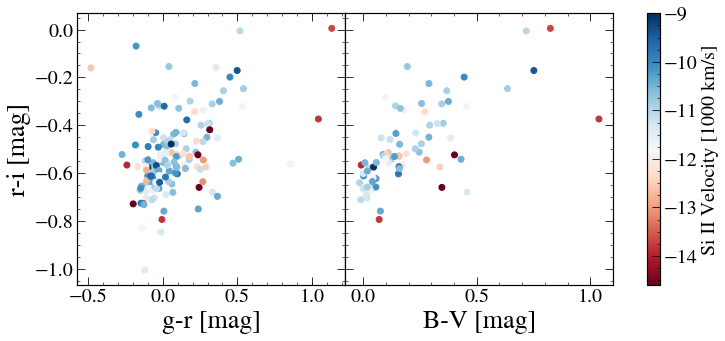

In [22]:
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
plt.subplots_adjust(wspace=0.0)
cbar = plotPeakCol(df_peak, ('g','r'), ('r','i'), ax1, 'g-r [mag]', 'r-i [mag]', draw_cbar=False, 
                   kcorr1=kgr_interp, kcorr2=kri_interp)
plotPeakCol(df_peak, ('B','V'), ('r','i'), ax2, 'B-V [mag]', None, draw_cbar=False, 
            kcorr1=kbv_interp, kcorr2=kri_interp)
ax2.set_ylim(ax1.get_ylim())
ax1.xaxis.get_label().set_fontsize(26)
ax1.yaxis.get_label().set_fontsize(26)
ax2.xaxis.get_label().set_fontsize(26)
ax2.yaxis.get_label().set_fontsize(26)
ax2.set_yticklabels([])
ax1.tick_params(labelsize=20)
ax2.tick_params(labelsize=20)
cb = fig.colorbar(cbar, ax=[ax1,ax2])
cb.set_label('Si II Velocity [1000 km/s]',fontsize=20)
cb.ax.tick_params(labelsize=20)
plt.savefig('colorColor_figures/gr_bv_ri_plot_kcorr.pdf',bbox_inches='tight')
plt.savefig('colorColor_figures/gr_bv_ri_plot_kcorr.png',bbox_inches='tight')

In [23]:
def plotPeakCol_cuts(df, keys1, keys2, keys1_cuts, keys2_cuts, ax, xlabel, ylabel, cbar_key='vel', draw_cbar=True, kcorr1=None, kcorr2=None, textloc=False, surveys=False):
    '''Plots the difference between the labels in the tuple keys1 vs the difference
       between the data in the tuple keys2. If kcorr(1 or 2) is not None then it can be a 
       callable function that takes a redshift and return a k-correction to be subtracted 
       from either keys1 or keys 2.
    '''

    diff1 = df[keys1[0]] - df[keys1[1]]
    diff2 = df[keys2[0]] - df[keys2[1]]
    
    mask1 = np.ones(len(df),dtype='bool')
    mask1[np.where(diff1 < keys1_cuts[0])] = False
    mask1[np.where(diff1 > keys1_cuts[1])] = False
    
    mask2 = np.ones(len(df),dtype='bool')
    mask2[np.where(diff2 < keys2_cuts[0])] = False
    mask2[np.where(diff2 > keys2_cuts[1])] = False
    
    mask = mask1 & mask2
    
    if kcorr1 is not None:
        diff1 = diff1 - kcorr1(df['z'])
    if kcorr2 is not None:
        diff2 = diff2 - kcorr2(df['z'])
    
    diff1_n = diff1[~np.isnan(diff1)]
    diff2_n = diff2[~np.isnan(diff1)]
    diff1_n = diff1_n[~np.isnan(diff2_n)]
    diff2_n = diff2_n[~np.isnan(diff2_n)]
    print pearsonr(diff1_n, diff2_n)
    
    df_masked = df[mask]
    diff1_m = df_masked[keys1[0]] - df_masked[keys1[1]]
    diff2_m = df_masked[keys2[0]] - df_masked[keys2[1]]
    
    if surveys:
        cbar=ax.scatter(diff1[(df.Survey=='Foundation') & mask],diff2[(df.Survey=='Foundation') & mask], marker='D',
                          c=df[cbar_key][(df.Survey=='Foundation') & mask],cmap='RdBu',vmin=-14.6,vmax=-9.0)
        print('Foundation N = {}'.format(len(diff1[~np.isnan(diff1) & (df_peak.Survey == 'Foundation')])))
        ax.scatter(diff1[(df.Survey=='CSP') & mask],diff2[(df.Survey=='CSP') & mask], marker='o',
                   c=df[cbar_key][(df.Survey=='CSP') & mask],cmap='RdBu',vmin=-14.6,vmax=-9.0)
        ax.scatter(diff1[mask], diff2[mask], marker='o', facecolors='none', edgecolors='none')
        print('CSP N = {}'.format(len(diff1[~np.isnan(diff1) & (df_peak.Survey != 'Foundation')])))
    else:
        cbar = ax.scatter(diff1[mask], diff2[mask], c=df_masked[cbar_key], cmap='RdBu', vmin=-14.6, vmax=-9.0)
    if textloc:
        ax.text(textloc[0],textloc[1],'N = {}'.format(len(diff1_n)), fontsize=18)
    if draw_cbar:
        cbar = plt.colorbar(ax)
        cbar.set_label('Si II Velocity [1000 km/s]')
    if xlabel is not None:
        ax.set_xlabel(xlabel)
    if ylabel is not None:
        ax.set_ylabel(ylabel)
    return cbar, df_masked

(0.4345800649393166, 4.71804708537385e-08)
(0.6729897304640184, 5.092103975027124e-11)
(-1.0643347289096767, -0.01015547462518223)
(-0.04101147574552192, 0.3182570623636764)


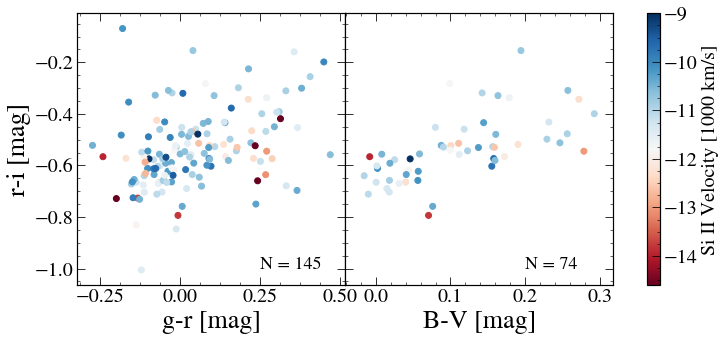

In [24]:
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
plt.subplots_adjust(wspace=0.0)
cbar, peak_masked = plotPeakCol_cuts(df_peak, ('g','r'), ('r','i'), (-0.4,0.5), (-99,99), ax1, 'g-r [mag]', 'r-i [mag]', 
                                     draw_cbar=False, kcorr1=kgr_interp, kcorr2=kri_interp, textloc=(0.25,-1.))
plotPeakCol_cuts(df_peak, ('B','V'), ('r','i'), (-99,0.3), (-99,99), ax2, 'B-V [mag]', None, draw_cbar=False, 
                 kcorr1=kbv_interp, kcorr2=kri_interp, textloc=(0.2,-1.))
ax2.set_ylim(ax1.get_ylim())
ax1.xaxis.get_label().set_fontsize(26)
ax1.yaxis.get_label().set_fontsize(26)
ax2.xaxis.get_label().set_fontsize(26)
ax2.yaxis.get_label().set_fontsize(26)
ax2.set_yticklabels([])
ax1.tick_params(labelsize=20)
ax2.tick_params(labelsize=20)
cb = fig.colorbar(cbar, ax=[ax1,ax2])
cb.set_label('Si II Velocity [1000 km/s]',fontsize=20)
cb.ax.tick_params(labelsize=20)
print(ax2.get_ylim())
print(ax2.get_xlim())
plt.savefig('colorColor_figures/gr_bv_ri_plot_kcorr_reduced_range.pdf',bbox_inches='tight')
plt.savefig('colorColor_figures/gr_bv_ri_plot_kcorr_reduced_range.png',bbox_inches='tight')

(0.4345800649393166, 4.71804708537385e-08)
Foundation N = 71
CSP N = 74
(0.6729897304640184, 5.092103975027124e-11)
Foundation N = 0
CSP N = 74


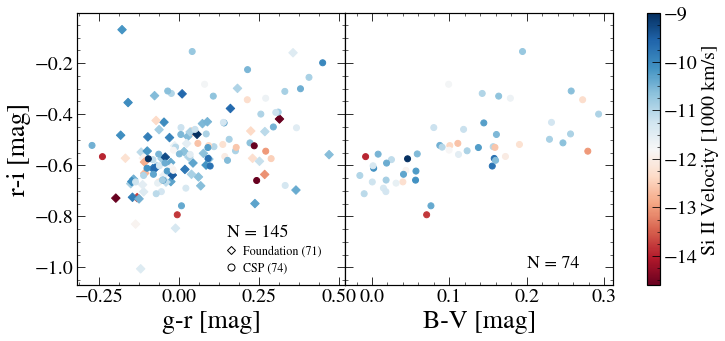

In [25]:
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
plt.subplots_adjust(wspace=0.0)
cbar, peak_masked = plotPeakCol_cuts(df_peak, ('g','r'), ('r','i'), (-0.4,0.5), (-99,99), ax1, 'g-r [mag]', 'r-i [mag]', 
                                     draw_cbar=False, kcorr1=kgr_interp, kcorr2=kri_interp, textloc=(0.15,-0.88),surveys=True)
plotPeakCol_cuts(df_peak, ('B','V'), ('r','i'), (-99,0.3), (-99,99), ax2, 'B-V [mag]', None, draw_cbar=False, 
                 kcorr1=kbv_interp, kcorr2=kri_interp, textloc=(0.2,-1.),surveys=True)
ax2.set_ylim(ax1.get_ylim())
ax1.xaxis.get_label().set_fontsize(26)
ax1.yaxis.get_label().set_fontsize(26)
ax2.xaxis.get_label().set_fontsize(26)
ax2.yaxis.get_label().set_fontsize(26)
ax2.set_yticklabels([])
ax1.tick_params(labelsize=20)
ax2.tick_params(labelsize=20)
cb = fig.colorbar(cbar, ax=[ax1,ax2])
cb.set_label('Si II Velocity [1000 km/s]',fontsize=20)
cb.ax.tick_params(labelsize=20)

legend_elements = [Line2D([0],[0], marker='D',color='k',fillstyle='none',linestyle='',label='Foundation (71)',markersize=6),
                  Line2D([0],[0], marker='o',color='k',fillstyle='none',linestyle='',label='CSP (74)',markersize=7)]
ax1.legend(handles=legend_elements,loc=(0.51,0.021),frameon=False,prop={'size':12},handletextpad=0.0)
plt.savefig('colorColor_figures/gr_bv_ri_plot_kcorr_survey_marker.pdf',bbox_inches='tight')
plt.savefig('colorColor_figures/gr_bv_ri_plot_kcorr_survey_marker.png',bbox_inches='tight')

In [26]:
gri_vel.to_csv('data/gri_bvriNames.txt',columns=['Name'])
ri_vel.to_csv('data/bv_riNames.txt',columns=['Name'])
peak_masked['Name'] = peak_masked.Name.str.lower()
peak_masked.to_csv('data/colorColorNames.txt',columns=['Name'])